In [1]:
import cv2
print(cv2.__version__)

4.1.0


In [2]:
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("Yoga_Box.jpg", cv2.IMREAD_GRAYSCALE)

# Show image
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
# Show data type
type(image)


numpy.ndarray

In [4]:
# Show image data
image

array([[154, 153, 153, ..., 155, 155, 155],
       [154, 151, 150, ..., 156, 155, 156],
       [153, 151, 152, ..., 155, 155, 155],
       ...,
       [ 88, 100, 101, ...,  57,  61,  53],
       [ 97, 104, 103, ...,  59,  62,  56],
       [ 97, 103, 104, ...,  61,  63,  61]], dtype=uint8)

In [5]:
# Show dimensions
image.shape


(852, 802)

In [6]:
# Show first pixel
image[0,0]

154

In [7]:
# Load image in color
image_bgr = cv2.imread("Yoga_Box.jpg", cv2.IMREAD_COLOR)

# Show pixel
image_bgr[0,0]

array([135, 151, 167], dtype=uint8)

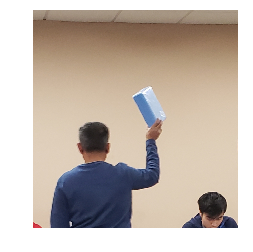

In [8]:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

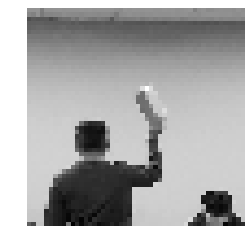

In [9]:
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))

# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

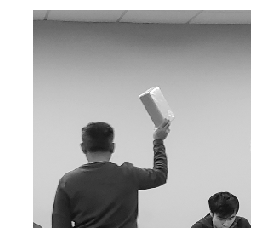

In [10]:
# Resize image to 256 pixels by 256 pixels
image_256X256 = cv2.resize(image, (256, 256))

# View image
plt.imshow(image_256X256, cmap="gray"), plt.axis("off")
plt.show()

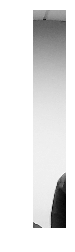

In [11]:
# Resizing images is a common task in image preprocessing for two reasons. 
# First, images come in all shapes and sizes, and to be usable as features, 
# images must have the same dimensions. This standardization of image size does come with costs, 
# however; images are matrices ofinformation and when we reduce the size of the image we are reducing the size 
# of that matrix and the information it contains. 
# -------------------------------------------------
# Second, machine learning can require thousands or hundreds of thousands of images. 
# When those images are very large they can take up a lot of memory, and by resizing them 
# we can dramatically reduce memory usage. 
# Some common image sizes for machine learning are 32 Ã— 32, 64 Ã— 64, 96 Ã— 96, and 256 Ã— 256.
# Select first half of the columns and all rows --- CROP th Image
image_cropped = image[:,:128]

# Show image
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

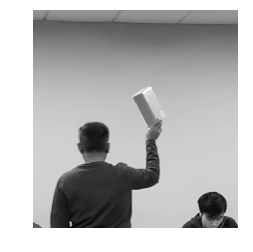

In [12]:
# Blur image
image_blurry = cv2.blur(image, (5,5))

# Show image
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

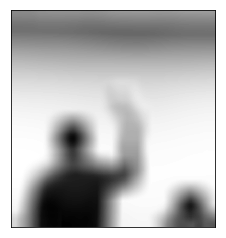

In [13]:
# We highlight the effect of kernel size, here is the same blurring with a 100 Ã— 100 kernel:
# Blur image
image_very_blurry = cv2.blur(image, (100,100))

# Show image
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
# We use Image Blurring to Sharpen the image for the edge detection
# Kernels are widely used in image processing to do everything fromsharpening to edge detection, 
# and will come up repeatedly in thischapter. 
# The blurring kernel we used looks like this:

# Create kernel
kernel = np.ones((5,5)) / 25.0

# Show kernel
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

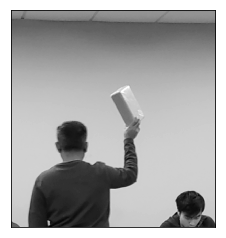

In [15]:
# Apply kernel
image_kernel = cv2.filter2D(image, -1, kernel)

# Show image
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

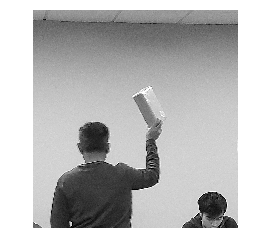

In [16]:
# Create kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# Sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)

# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

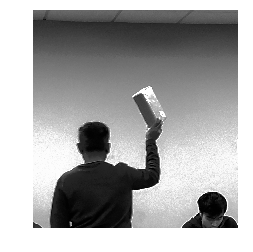

In [17]:
# Enhance image 
image_enhanced = cv2.equalizeHist(image)

# Show image
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

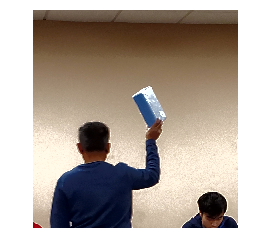

In [18]:
# when we have a color image, we first need to convert the imageto the YUV color format.
# The Y is the brightness, and U and V denote the color. After the conversion, 
# we can apply equalizeHist to the image and then convert it back to BGR or RGB:

# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])

# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

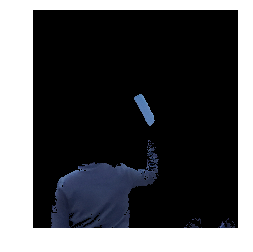

In [19]:
# histogram equalization transforms the image so that it uses a wider range of pixel intensities.
# Let us isolate a color in an amage.

# Convert BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Define range of blue values in HSV
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

# Create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# Mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

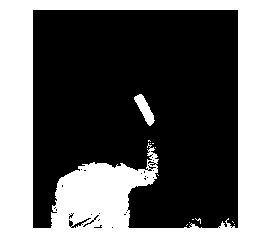

In [20]:
# Have a look at the following for the next topic...
# http://learn.leighcotnoir.com/artspeak/elements-color/hue-value-saturation/

# Show image
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

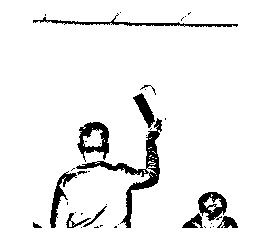

In [21]:
# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10

image_binarized = cv2.adaptiveThreshold(image, 
                                        max_output_value,     
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  
                                        cv2.THRESH_BINARY,     
                                        neighborhood_size,  
                                        subtract_from_mean)

# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

In [22]:
# Our solution has four important arguments in adaptiveThreshold.max_output_value simply determines 
# the maximum intensity of the outputpixel intensities.
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Rectangle values: start x, start y, width, height
rectangle = (0, 56, 256, 150)

# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb, # Our image   
            mask, # The Mask     
            rectangle, # Our rectangle     
            bgdModel, # Temporary array for background  
            fgdModel, # Temporary array for background  
            5, # Number of iterations       
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[3.62159842e-01, 1.59702899e-01, 1.21917587e-01, 2.43364176e-01,
         1.12855496e-01, 2.20469299e+02, 2.03240452e+02, 1.81827821e+02,
         4.56321718e+01, 5.16296300e+01, 7.59928501e+01, 1.39089579e+02,
         1.06222481e+02, 8.35336256e+01, 1.98806266e+02, 1.75981168e+02,
         1.50355783e+02, 1.57479922e+02, 1.48158523e+02, 1.42561428e+02,
         8.17331015e+00, 9.24567427e+00, 1.15202795e+01, 9.24567427e+00,
         1.09508628e+01, 1.31101321e+01, 1.15202795e+01, 1.31101321e+01,
         1.79981746e+01, 1.39711294e+02, 1.41570960e+02, 1.65457701e+02,
         1.41570960e+02, 1.84758255e+02, 2.78241061e+02, 1.65457701e+02,
         2.78241061e+02, 5.20100446e+02, 3.93964971e+02, 3.19456815e+02,
         2.66722296e+02, 3.19456815e+02, 3.6

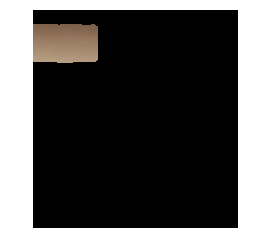

In [23]:
# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

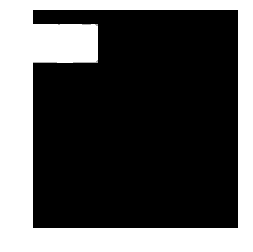

In [24]:
# Show mask
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

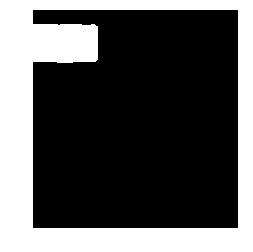

In [25]:
# Show mask
plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()

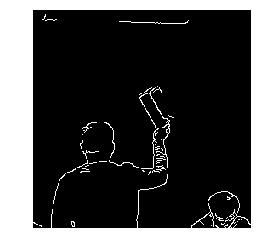

In [26]:
image_gray = image_256X256

# Calculate median intensity
median_intensity = np.median(image_gray)

# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

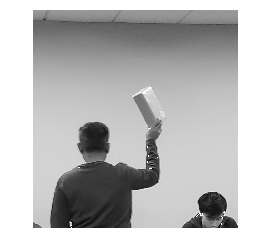

In [27]:
# For understanding, what is Canny Edge Detection, have a look at:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

# Load image as grayscale
image_bgr = cv2.imread("Yoga_Box.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04

# Detect corners
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,  
                                      aperture,  
                                      free_parameter)

# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)

# Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr[detector_responses >
          threshold *  
          detector_responses.max()] = [255,255,255]

# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()


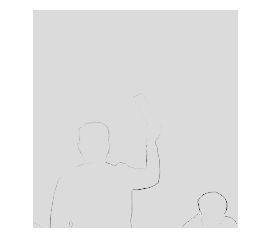

In [28]:
# The Harris corner detector is a commonly used method of detecting theintersection of two edges. 
# Our interest in detecting corners ismotivated by the same reason as for deleting edges: 
# corners arepoints of high information.

# For more details, have a look at:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

# Show potential corners
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()